In [1]:
from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=100, centers=2,cluster_std=0.5,random_state=0)

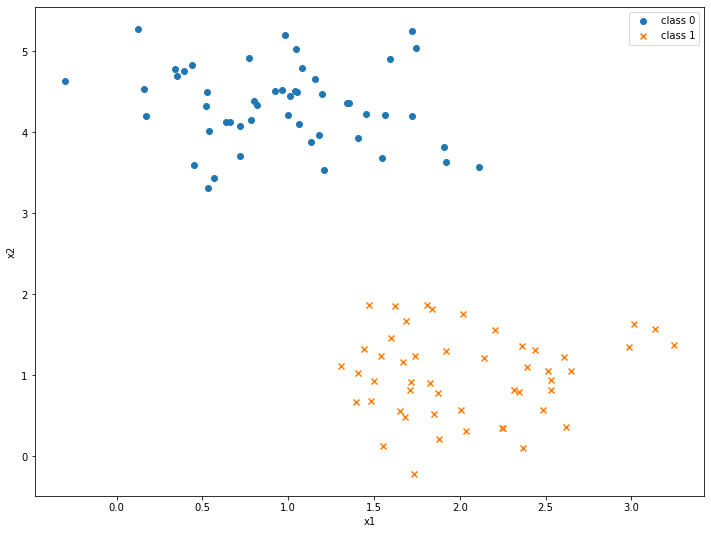

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o',
label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x',
label="class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

In [4]:
from sklearn.svm import SVC
model=SVC(kernel='linear').fit(X_train,y_train)

In [5]:
model.n_support_

array([2, 1])

In [6]:
model.support_

array([18, 43, 13])

In [7]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

<ipython-input-9-079be4043529>:13: UserWarning: The following kwargs were not used by contour: 'level'
  ax.contour(X, Y, P,level=[-1, 0, 1], colors='k',linestyles=['--', '-', '--'])


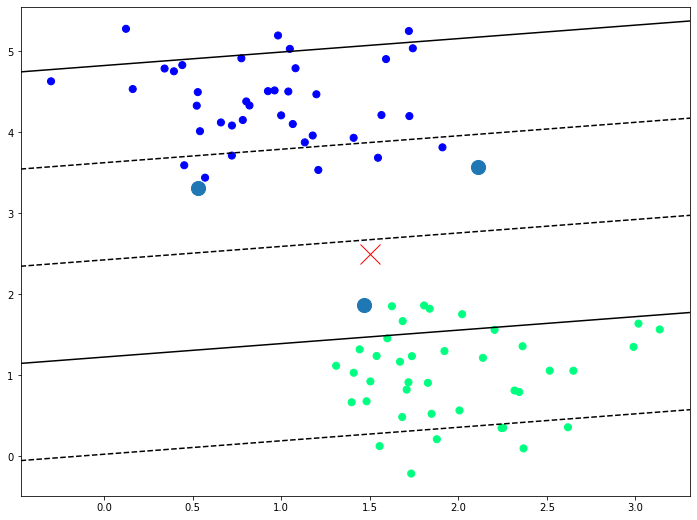

In [9]:
import numpy as np
def plot_svc(model,ax=None):
    if ax==None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(), Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,level=[-1, 0, 1], colors='k',linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.figure(figsize=(12,9))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, s=50,cmap='winter')
X_new=[1.5,2.5]
plt.plot(X_new[0],X_new[1],'x',color='red', markersize=20)
plot_svc(model)

In [10]:
model.predict([[1.5,2.5]])

array([1])

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01,
0.001, 0.00001, 10]}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 0.1, 'gamma': 1}
Best Estimators:
 SVC(C=0.1, gamma=1)


In [12]:
model = grid.best_estimator_
model

SVC(C=0.1, gamma=1)

In [13]:
pred=model.predict(X_test)
print(model.score(X_train, y_train)) 
print(model.score(X_test, y_test)) 

1.0
1.0
